In [164]:
import numpy as np   # importamos la liberia.
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy import interpolate
import pandas as pd

Text(0, 0.5, 'y')

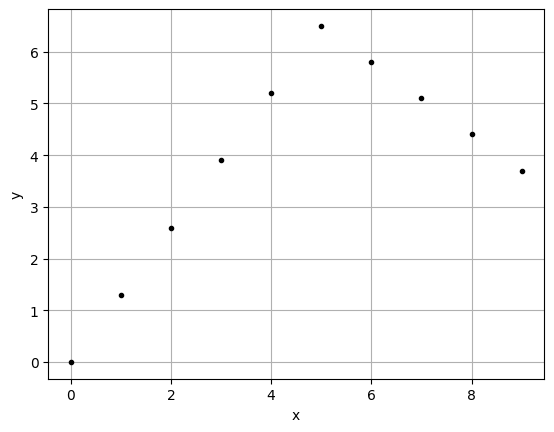

In [165]:
datos = pd.read_csv('fit_curve.csv', index_col=False)  # leemos los datos.
datos # estos son los datos a considerar
# procedemos a graficar:

plt.plot(datos["x"],datos["y"],".k",lw=3)  # graficamos
plt.grid()
plt.xlabel("x")
plt.ylabel("y")




los parametros a y b son los siguientes respectivamente 0.1726827094456106 1.9655525846723374
el valor de a es 0.1726827094456106
el valor de b es 1.9655525846723374
los errores asociiados son [0.01626998 0.11933787]


Text(0.5, 1.0, 'grafica y ajuste')

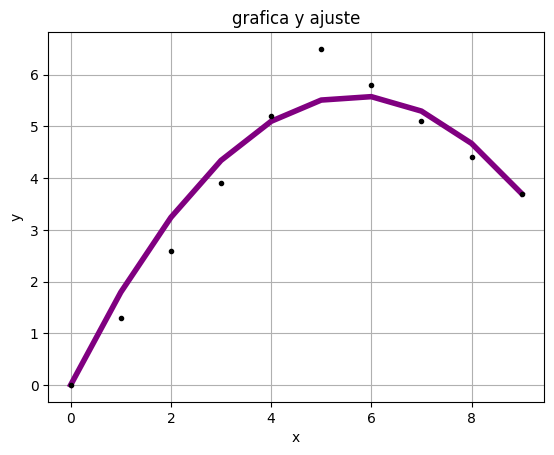

In [166]:
# proponemos una curva de ajuste:
# definimos la funcion
x_dato=datos["x"]  # datos en x
y_dato=datos["y"]  # datos en y

# primero lo haremos con curve_fit.
x=x_dato
y=y_dato
def func(x, a, b):   # Funcion ajuste exponencial
    return (-a*x**2+b*x)   # podemos aproximarla a una cuadratica.
 
popt, pcov = curve_fit(func, x_dato, y_dato)  # tenemos los parametros

print("los parametros a y b son los siguientes respectivamente",*popt)
# Veamos el error de los parametros.
a=popt[0]
b=popt[1]
print("el valor de a es",a)
print("el valor de b es",b)
# erroes de los parametros:
print("los errores asociiados son",np.sqrt(np.diag(pcov)))  # calculamos el error asociado
plt.plot(x, func(x, *popt),lw=4,color="purple")
plt.plot(datos["x"],datos["y"],".k",lw=3)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("grafica y ajuste")
  # aqui tenemos el ajuste con curve_fit

# con scipy.
# aqui tenemos una propuesta de una ecuacion cuadratica en la cual los datos se ajustan muy bien
# y nos permiten calcular el error asociado de los parametros.



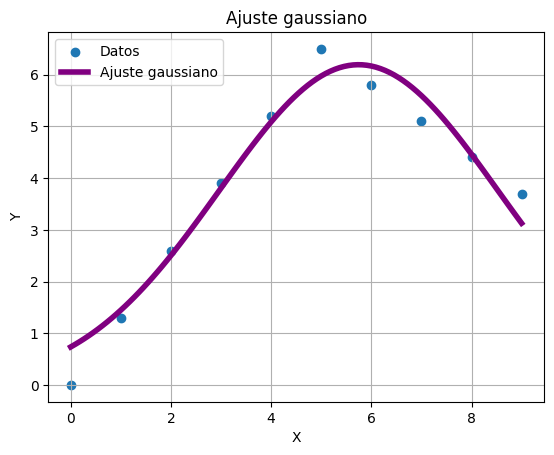

los parametros son respectivamente [6.19486421 5.74654946 2.78281371]
Chi cuadrado: 0.9758423564612222


In [167]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean)**2) / (2 * stddev**2))  # aqui tenemos un ajuste gaussiano

# Datos de ejemplo
x = x_dato  # tenemos los datos en x
y = y_dato   # tenemos los datos en y

# Ajuste gaussiano
initial_guess = [1, np.mean(x), np.std(x)]  # Estimación inicial de los parámetros
params, _ = curve_fit(gaussian, x, y, p0=initial_guess)

# Generar curva ajustada
x_fit = np.linspace(min(x), max(x), 100)   # generamos la curba ajustada
y_fit = gaussian(x_fit, *params)  # curva ajustada

# Gráfico
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, color='purple', label='Ajuste gaussiano',lw=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste gaussiano')
plt.legend()
plt.grid(True)
plt.show()

# aqui tenemos la curva ajustada ahora para tener los parametros tenemos que


print("los parametros son respectivamente",params)  # estos son los parametros asociados
y_expected = gaussian(x, *params)  # aqui tenemos la funcion para calcular en el chi cuadrado

chi2 = np.sum((y - y_expected)**2 / y_expected)  # calculamos el chi cuadrado

print("Chi cuadrado:", chi2) # imprimimos el valor del chi_cuadrado.
# todo esto se hizo con scipy_curve_fit ahora procedemos a realizarlo con la funcion minimize.


el resultado es (parametros)    [0.17268257 1.9655516 ]
el chi cuadrado es 2.000891265614633


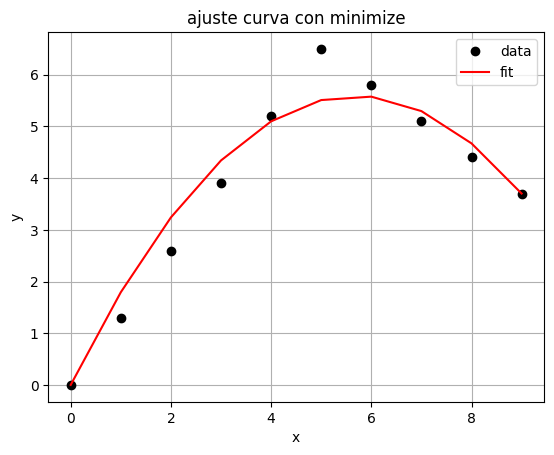

In [168]:
def fun_line1(x, param1):   # definimos nuestra funcion
    return  -param1[0]*x**2+param1[1]*x


def chi2(param1):  # definimos nuestro chi_cuadrado
    return np.sum(np.square(y_dato-fun_line1(x_dato,param1)))

result1 = minimize(chi2,(0,1))  # con minimize.
print("el resultado es (parametros)   ",result1.x) 
print("el chi cuadrado es",chi2(result1.x))


plt.plot(x_dato,y_dato,"ko",label="data")
plt.plot(x_dato,fun_line1(x_dato,result1.x),"r-",label="fit")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("ajuste curva con minimize")
plt.show()
# propouesta de solucion chi_cuadrado.







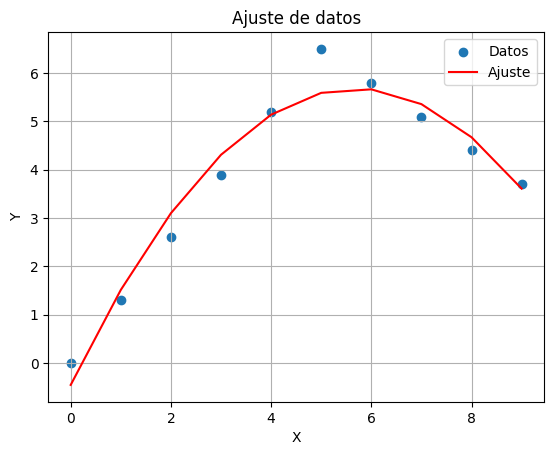

In [169]:
fit = np.polyfit(x, y, deg=2)  # Ajuste lineal (puedes cambiar el grado según el tipo de ajuste deseado)
fit_fn = np.poly1d(fit)       # Función ajustada  # con polyfit

# Gráfico
plt.scatter(x, y, label='Datos')             # Gráfico de puntos
plt.plot(x, fit_fn(x), color='red', label='Ajuste')  # Gráfico de la función ajustada
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de datos')
plt.grid(True)
plt.legend()
plt.show()
# tambien podemos hacer el ajuste con polyfit de la libreria de numpy podemos aplicarle a los datos un ajuste cuadratico y podemos ver que se ajusta muy bien.

de  las tres formas distintas de poder ajustar la curva con curve_fit, minimize y polyfit y calcular por supuesto su error asociado.

segundo y tercer numeral

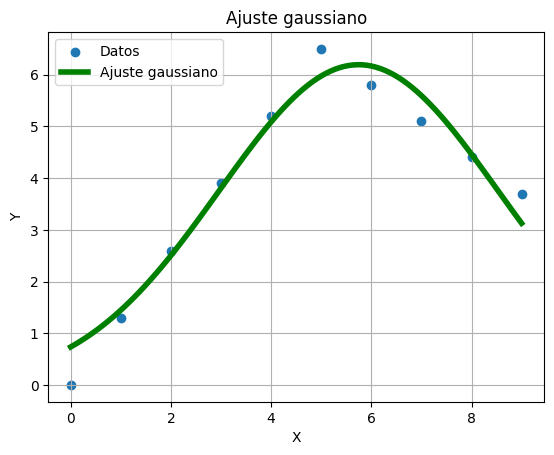

los parametros son respectivamente [6.19486421 5.74654946 2.78281371]


In [170]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean)**2) / (2 * stddev**2))

# Datos de ejemplo
x = x_dato
y = y_dato

# Ajuste gaussiano
initial_guess = [1, np.mean(x), np.std(x)]  # Estimación inicial de los parámetros
params, _ = curve_fit(gaussian, x, y, p0=initial_guess)

# Generar curva ajustada
x_fit = np.linspace(min(x), max(x), 100)
y_fit = gaussian(x_fit, *params)

# Gráfico
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, color='green', label='Ajuste gaussiano',lw=4)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste gaussiano')
plt.legend()
plt.grid(True)
plt.show()

# aqui tenemos la curva ajustada ahora para tener los parametros tenemos que


print("los parametros son respectivamente",params)

In [171]:

y_expected = gaussian(x, *params)

chi2 = np.sum((y - y_expected)**2 / y_expected)

print("Chi cuadrado:", chi2)

Chi cuadrado: 0.9758423564612222


los parametros requeridos son:  [6.19486322 5.74654926 1.9677472 ]
el chi_cuadrado de nuestro problema es 1.581760277649442


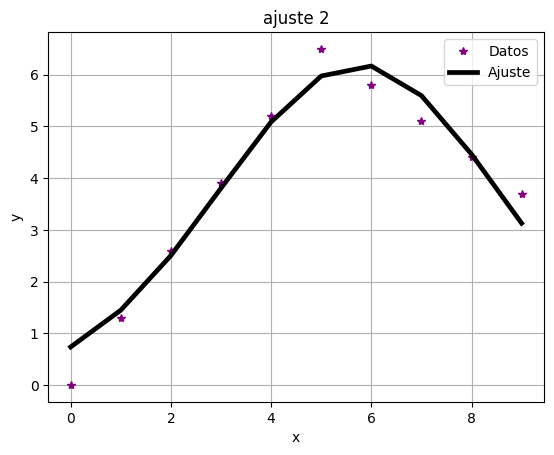

In [172]:
# TERCER PUNTO
# tenemos que considerar la funcion mas general calcular los parametros ajustados y el chi_cuadrado:
# podemos repetir el proceso ya no con curve_fit sino con minimize para esto tenemos lo siguiente:


def gauss(x,param): 
    return param[0]*np.exp(-(x-param[1])**2/(2*param[2])**2) 

def chi2(param): #funcion chi2
    return np.sum(np.square(y-gauss(x,param)))

result = minimize(chi2, [1,1,1]) #minimizo chi2
print('los parametros requeridos son: ',result.x)
print("el chi_cuadrado de nuestro problema es",chi2(result.x)) # tengo el chi cuadrado

plt.plot(x, y, '*', label='Datos',color="purple",lw=4) #muestro datos
plt.plot(x, gauss(x, result.x), label='Ajuste',color="black",lw=3.4) #muestro ajuste
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("ajuste 2")
plt.grid()
plt.show()
# aqui tenemos la grafica con ajuste en minimizw, hasta el momento hemos ajustado en dos fuentes distintas
# en sicpy y en minimize ahora procedemos a la parte mas general
# realizaremos lo mismo pero con la funcion mas general, para ajustar los datos usando minimize tenemos que














Parámetros requeridos:  [ 519.89538455    3.05244992   26.12015891 -518.58142908]
el valor del chi_cuadrado es:  1.6705774214560942


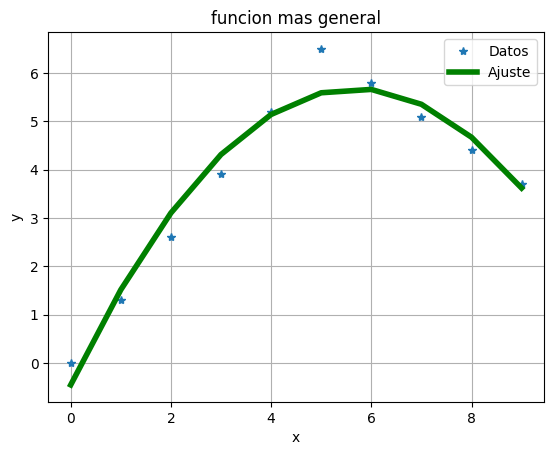

In [173]:
# funcion mas general


def gaus_one(x,param): # tenemos nuestra funcion que queremos ajustar.
    return x + param[3] + param[0]*np.exp(-(x-param[1])**2/(2*param[2])**2) # parametros requeridos, parameters requirements

def chi2(param): 
    return np.sum(np.square(y-gaus_one(x,param)))  # retornamos funcion el chi_cadrado intervalos

result = minimize(chi2, [1,1,1,1]) # minimizacion
print('Parámetros requeridos: ',result.x) # se imprimen los parametros
print('el valor del chi_cuadrado es: ',chi2(result.x)) # valor del chi cuadrado

plt.plot(x, y, '*', label='Datos') # grafica
plt.plot(x, gaus_one(x, result.x), label='Ajuste',color="green",lw=4) # grafica.
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("funcion mas general")
plt.grid()
plt.show()








# Segundo Punto

Text(0.5, 1.0, ' price vs highway     ')

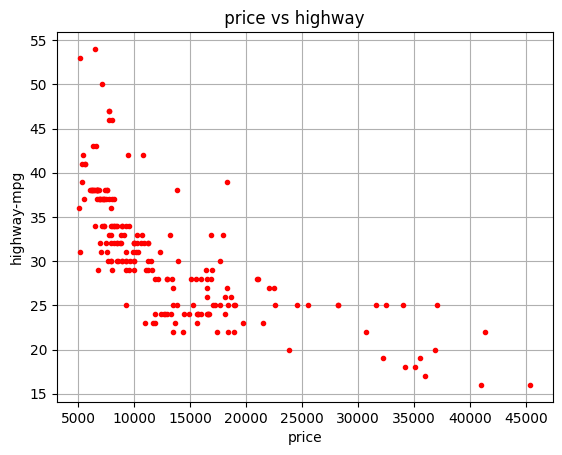

In [174]:
# procedemos a solucionar el ultimo ejercicio
carros = pd.read_csv('auto.csv') #cargo el archivo csv
carros.head() #muestro los primeros 5 datos

# iniciemos con los plots.
carros.sort_values(by=['highway-mpg'], ascending=True, inplace=True) #ordenar

carros
carros.sort_values(by=['price'], ascending=True, inplace=True)

plt.plot(carros["price"],carros["highway-mpg"],".r")
plt.xlabel("price")
plt.ylabel("highway-mpg")
plt.grid()
plt.title(" price vs highway     ")




En este grafico se puede observar que entre 5000 y 10000 hay una mayor acumulacion de puntos esto significa que las personas prefieren carros donde el precio se bajo y el galon por millas sea muy alto es decir tener carros mucho mas eficientes a cuanto a trayectoria como a perdida de combustible, asi que se puede concluir que la mayoria de las personas prefieren carros mas economicos y con una buen alcance de millas por galon de combustible.

La otra conclusion es que los carros mas caros tienen que gastar mas galones para recorrer mas millas y esto es obvio porque entre mas lujoso es un coche tiene mas aceleracion fuerza y velocidad y por lo tanto necesita mas combustible

In [133]:
carros.head()

Unnamed: 0  symboling  normalized-losses        make aspiration   
134         134          2                 83      subaru        std  \
17           17          2                121   chevrolet        std   
47           47          1                104       mazda        std   
146         146          1                 87      toyota        std   
73           73          2                161  mitsubishi        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...   
134          two  hatchback          fwd           front        93.7  ...  \
17           two  hatchback          fwd           front        88.4  ...   
47           two  hatchback          fwd           front        93.1  ...   
146          two  hatchback          fwd           front        95.7  ...   
73           two  hatchback          fwd           front        93.7  ...   

     compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg   price   
134                9.0        69.0    4900.0        31          36  5118.0  \
17                 9.5        48.0    5100.0        47          53  5151.0   
47                 9.0        68.0    5000.0        30          31  5195.0   
146                9.0        62.0    4800.0        35          39  5348.0   
73                 9.4        68.0    5500.0        37          41  5389.0   

     city-L/100km horsepower-binned  diesel  gas  
134      7.580645               Low       0    1  
17       5.000000               Low       0    1  
47       7.833333               Low       0    1  
146      6.714286               Low       0    1  
73       6.351351               Low       0    1  

[5 rows x 30 columns]

In [175]:
carros.sort_values(by=['price'], ascending=True, inplace=True) #ordenar

carros
carros.sort_values(by=['horsepower'], ascending=True, inplace=True)


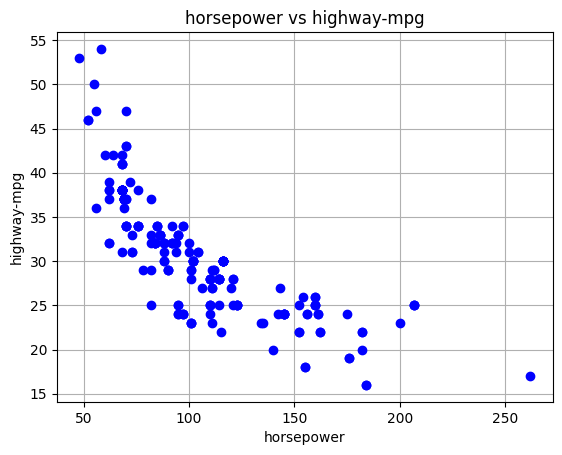

In [176]:
plt.plot(carros['horsepower'], carros['highway-mpg'], 'bo', label='Datos') #muestro datos
plt.grid()
plt.xlabel("horsepower")
plt.ylabel("highway-mpg")
plt.title("horsepower vs highway-mpg")

plt.show()

Aqui en este grafico se puede observar que cuando se tiene mayor caballos de fuerza se requiere de mucha mas gasolina para recorrer un trayecto, esto tiene mucho sentido porque si tenemos un carro muy lujoso como una camioneta esta requerira mas gasolina para llegar a cierto lugar que un chevrolet spark por ejemplo. ademas tambien se vera afectado el recorrido, pues se tendria que un carro lujoso podria recorrer muchas menos millas por galon de gasolina porque este requiere de mas gasolina.

Text(0.5, 1.0, 'price vs diesel and price vs gas')

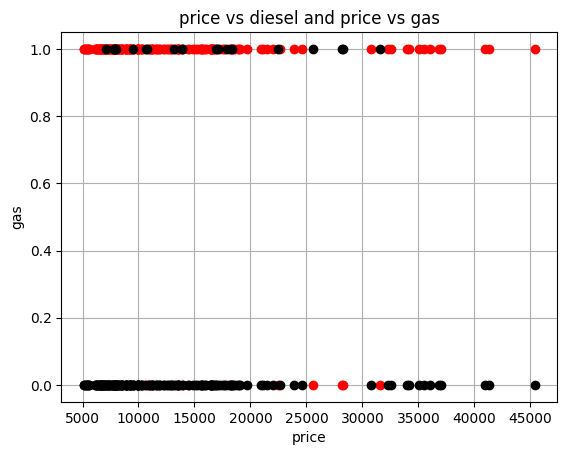

In [177]:

carros.sort_values(by=['diesel'], ascending=True, inplace=True)
plt.plot(carros["price"],carros["gas"],"ro")
plt.plot(carros["price"],carros["diesel"],"ko")
plt.grid()
plt.xlabel("price")
plt.ylabel("gas")
plt.title("price vs diesel and price vs gas")

In [178]:
carros

Unnamed: 0  symboling  normalized-losses        make aspiration   
17           17          2                121   chevrolet        std  \
5             5          2                122        audi        std   
130         130          3                150        saab        std   
187         187          0                122  volkswagen        std   
129         129          2                104        saab        std   
..          ...        ...                ...         ...        ...   
199         199         -1                 95       volvo      turbo   
109         109          0                161      peugot      turbo   
113         113          0                161      peugot      turbo   
60           60          0                122       mazda        std   
105         105          0                161      peugot      turbo   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...   
17           two  hatchback          fwd           front        88.4  ...  \
5            two      sedan          fwd           front        99.8  ...   
130          two  hatchback          fwd           front        99.1  ...   
187         four      sedan          fwd           front       100.4  ...   
129         four      sedan          fwd           front        99.1  ...   
..           ...        ...          ...             ...         ...  ...   
199         four      sedan          rwd           front       109.1  ...   
109         four      sedan          rwd           front       107.9  ...   
113         four      sedan          rwd           front       107.9  ...   
60          four      sedan          fwd           front        98.8  ...   
105         four      sedan          rwd           front       107.9  ...   

     compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price   
17                 9.5        48.0    5100.0        47          53   5151.0  \
5                  8.5       110.0    5500.0        19          25  15250.0   
130                9.3       110.0    5250.0        21          28  15040.0   
187                8.5       110.0    5500.0        19          24  13295.0   
129                9.3       110.0    5250.0        21          28  12170.0   
..                 ...         ...       ...       ...         ...      ...   
199               23.0       106.0    4800.0        26          27  22470.0   
109               21.0        95.0    4150.0        28          33  16900.0   
113               21.0        95.0    4150.0        28          33  17950.0   
60                22.7        64.0    4650.0        36          42  10795.0   
105               21.0        95.0    4150.0        28          33  13200.0   

     city-L/100km horsepower-binned  diesel  gas  
17       5.000000               Low       0    1  
5       12.368421            Medium       0    1  
130     11.190476            Medium       0    1  
187     12.368421            Medium       0    1  
129     11.190476            Medium       0    1  
..            ...               ...     ...  ...  
199      9.038462            Medium       1    0  
109      8.392857               Low       1    0  
113      8.392857               Low       1    0  
60       6.527778               Low       1    0  
105      8.392857               Low       1    0  

[201 rows x 30 columns]

Aqui se puede observar que a medida que el precio aumenta hay casi la misma cantidad de carros que usan gas o diesel es decir muchos carros lujosos pueden usar cualquiera de los dos combustibles, asi que esto nos conlleva a pensar que en el mercado de hoy en dia abundan los dos combustible casi por igual medida. ademas en los carros economicos prevalece un poco mas el diesel que el gas aunque tambien hay algunos carros que usan gas.

Text(0.5, 1.0, '  price vs horsepower  ')

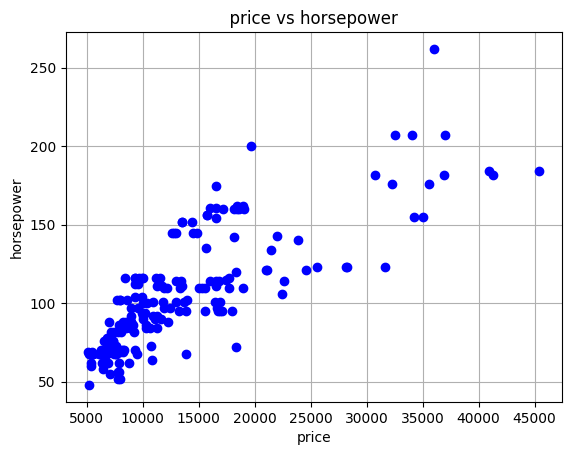

In [179]:
# ahora hagamos el ultimo
plt.plot(carros["price"],carros["horsepower"],"bo")
plt.grid()
plt.xlabel("price")
plt.ylabel("horsepower")
plt.title("  price vs horsepower  ")

Aqui podemos observar que entre menor caballos de fuerza tenemos autos mas economicos, eso es logico pues los carros mas economicos son los que tienen menor potencia en el mercado ademas si observamos tenemos muy pocos carros con mas de 35000 caballos de fuerza y solo uno alrededor de los 45000, estos carros con estos caballos de fuerza son de carreras y muy lujosos.

Cordial saludo señor director:
27 de mayo 2023

Me dirijo a usted para comentarle la relacion que hemos tenido en el mercado entre el precio y los caballos de fuerza. Hoy en dia estamos produciendo todo tipo de autos, autos economicos y lujosos, hemos hecho un estudio y entre mas caballos de fuerza,tenemos que los autos cuestan muchisimo mas que los carros mas economicos pero no solo eso del total de autos producidos que hemos encontrado la mayoria de autos estan entre 5000 10.000 caballos de fuerza lo que implica que las personas prefieren este tipo de autos ya que les garantizan una muy buen rentabilidad tanto en caballos de fuerza como en la parte economica. por esta razon las ganancias han estado al alza y lo mas recomendable es continuar con este tipo de produccion ya que la parte economica de las personas es fundamental y el mercado de carros esta evolucionando en la direccion de carros economicos con menos caballos de fuerza por lo que recomiendo aumentar su produccion.

